<a href="https://colab.research.google.com/github/sanskritiii18/Deep_Learning_prj/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_test=X_test/255
X_train=X_train/255

In [ ]:
print(len(X_train))
print(len(y_test))

print(len(X_test))
print(len(y_train))

60000
10000
10000
60000


In [ ]:
print(X_train[46])
print(y_train[46])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

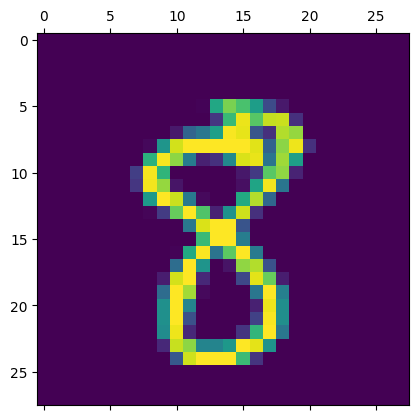

In [ ]:
plt.matshow(X_train[46])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8171 - loss: 0.7160
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9126 - loss: 0.3130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9186 - loss: 0.2888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9256 - loss: 0.2663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 0.2634


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.3022


[0.26770392060279846, 0.9269999861717224]

In [ ]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_predicted[0]

array([1.60297565e-02, 4.47818081e-07, 7.60658681e-02, 9.55767691e-01,
       3.95862479e-03, 9.54822898e-02, 2.18382957e-06, 9.99830961e-01,
       1.18764326e-01, 6.31512761e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

np.int64(7)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_predicted, axis=1))
print(confusion_matrix)

tf.Tensor(
[[ 960    0    0    2    0    5    6    2    4    1]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   3    9  930   12    6    3   12   10   43    4]
 [   4    0   22  922    1   17    2   11   26    5]
 [   1    1    5    1  918    0   10    4   11   31]
 [   8    3    2   38   11  756   18    9   41    6]
 [   9    3    6    1    7    9  917    2    4    0]
 [   1    5   24    5    7    0    0  957    5   24]
 [   4    7    6   15    9   16   10   12  889    6]
 [  10    7    1   11   26    5    0   28    9  912]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

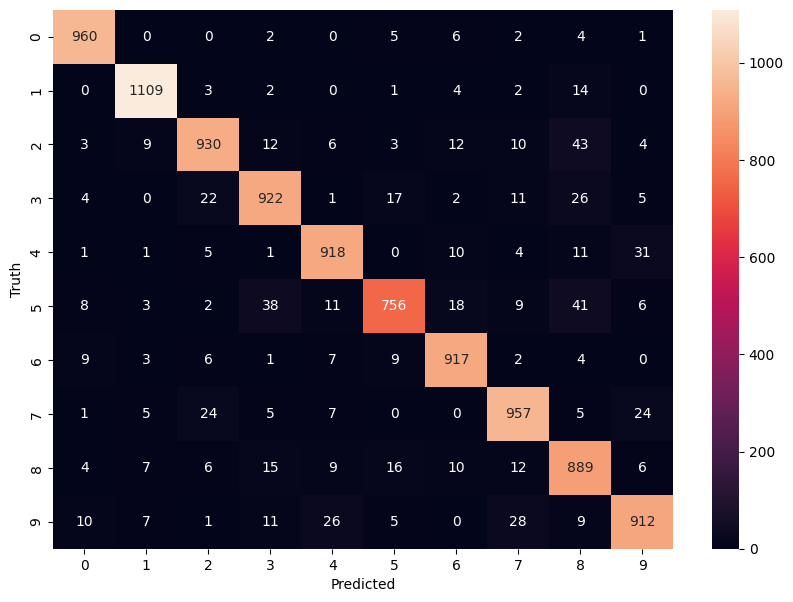

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

for the first value 960 it means that our model predicted 960 "0" for actual "0" value and 3 times "2" for "0" similarly other , hence example of conufusion matrix
